In [1]:
import os
from pathlib import Path

NOTEBOOK_PATH: Path = Path(os.path.abspath(''))

DATA_PATH: Path = NOTEBOOK_PATH.parent.parent.joinpath('data')

PATH_FOR_RESULT: Path = NOTEBOOK_PATH.joinpath('RESULT')

if not PATH_FOR_RESULT.exists():
    PATH_FOR_RESULT.mkdir()

print(f'当前运行目录：{NOTEBOOK_PATH}')
print(f'当前数据目录：{DATA_PATH}')

当前运行目录：d:\Development\Jupyter\InvestmentNotebook\notebook\candlestick
当前数据目录：d:\Development\Jupyter\InvestmentNotebook\data


In [2]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

from typing import Dict, List, Tuple, Any

# 使用 mplfinance 绘制蜡烛图

## 数据

使用分钟数据。

In [3]:
symbol: str = 'SHFE.al2112'
period: str = 'Minute'

## 准备

### 设置 pandas

In [4]:
import pandas as pd

pd.set_option('max_columns', None)
pd.set_option('display.width', 200)

### 设置 mplfinance

In [5]:
import mplfinance as mpf

mpf_color = mpf.make_marketcolors(
    up='red',  # 上涨K线的颜色
    down='green',  # 下跌K线的颜色
    inherit=True
)

mpf_style = mpf.make_mpf_style(
    marketcolors=mpf_color,
    rc={
        'font.family': 'SimHei',       # 指定默认字体：解决plot不能显示中文问题
        'axes.unicode_minus': False,   # 解决保存图像是负号'-'显示为方块的问题
    }
)

### 加载数据

In [6]:
from pathlib import Path

def load_bar_data(data_file: Path, datetime_index: bool = True) -> pd.DataFrame:
    """
    加载 bar 数据为 pandas.DataFrame。
    :param data_file:
    :param datetime_index:
    :return:
    """
    if not data_file.exists():
        raise FileNotFoundError(f'{data_file} not found.')

    if datetime_index:
        return pd.read_csv(data_file, parse_dates=['datetime'], index_col=['datetime'])
    else:
        return pd.read_csv(data_file, parse_dates=['datetime'])

In [7]:
origin_data: pd.DataFrame = load_bar_data(DATA_PATH.joinpath(f'{symbol}_{period}.csv'))

origin_data.info()
print('-' * 100)
origin_data.head(5)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92025 entries, 2020-12-15 21:00:00 to 2021-10-19 00:59:00
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime_nano  92025 non-null  int64  
 1   open           92025 non-null  float64
 2   high           92025 non-null  float64
 3   low            92025 non-null  float64
 4   close          92025 non-null  float64
 5   volume         92025 non-null  int64  
 6   open_oi        92025 non-null  int64  
 7   close_oi       92025 non-null  int64  
dtypes: float64(4), int64(4)
memory usage: 6.3 MB
----------------------------------------------------------------------------------------------------


,datetime_nano,open,high,low,close,volume,open_oi,close_oi
datetime,,,,,,,,
2020-12-15 21:00:00,1608037200000000000,14945.0,14945.0,14945.0,14945.0,5,0,5
2020-12-15 21:01:00,1608037260000000000,14945.0,15650.0,14945.0,15650.0,5,5,5
2020-12-15 21:02:00,1608037320000000000,15650.0,15650.0,15650.0,15650.0,0,5,5
2020-12-15 21:03:00,1608037380000000000,15650.0,15650.0,15650.0,15650.0,0,5,5
2020-12-15 21:04:00,1608037440000000000,15650.0,15650.0,15450.0,15455.0,2,5,5


## 裁剪数据

In [8]:
df_plot = origin_data.loc['2021-10-15 21:00:00':'2021-10-18 00:59:00', ['open', 'high', 'low', 'close', 'volume']]

df_plot.info()
print('-' * 100)
df_plot.head(5)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 240 entries, 2021-10-15 21:00:00 to 2021-10-16 00:59:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    240 non-null    float64
 1   high    240 non-null    float64
 2   low     240 non-null    float64
 3   close   240 non-null    float64
 4   volume  240 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.2 KB
----------------------------------------------------------------------------------------------------


,open,high,low,close,volume
datetime,,,,,
2021-10-15 21:00:00,24500.0,24680.0,24450.0,24505.0,9139
2021-10-15 21:01:00,24505.0,24635.0,24505.0,24525.0,4278
2021-10-15 21:02:00,24525.0,24530.0,24440.0,24455.0,3733
2021-10-15 21:03:00,24455.0,24495.0,24390.0,24490.0,3569
2021-10-15 21:04:00,24490.0,24590.0,24490.0,24580.0,2048


## 绘图

### 光板K线

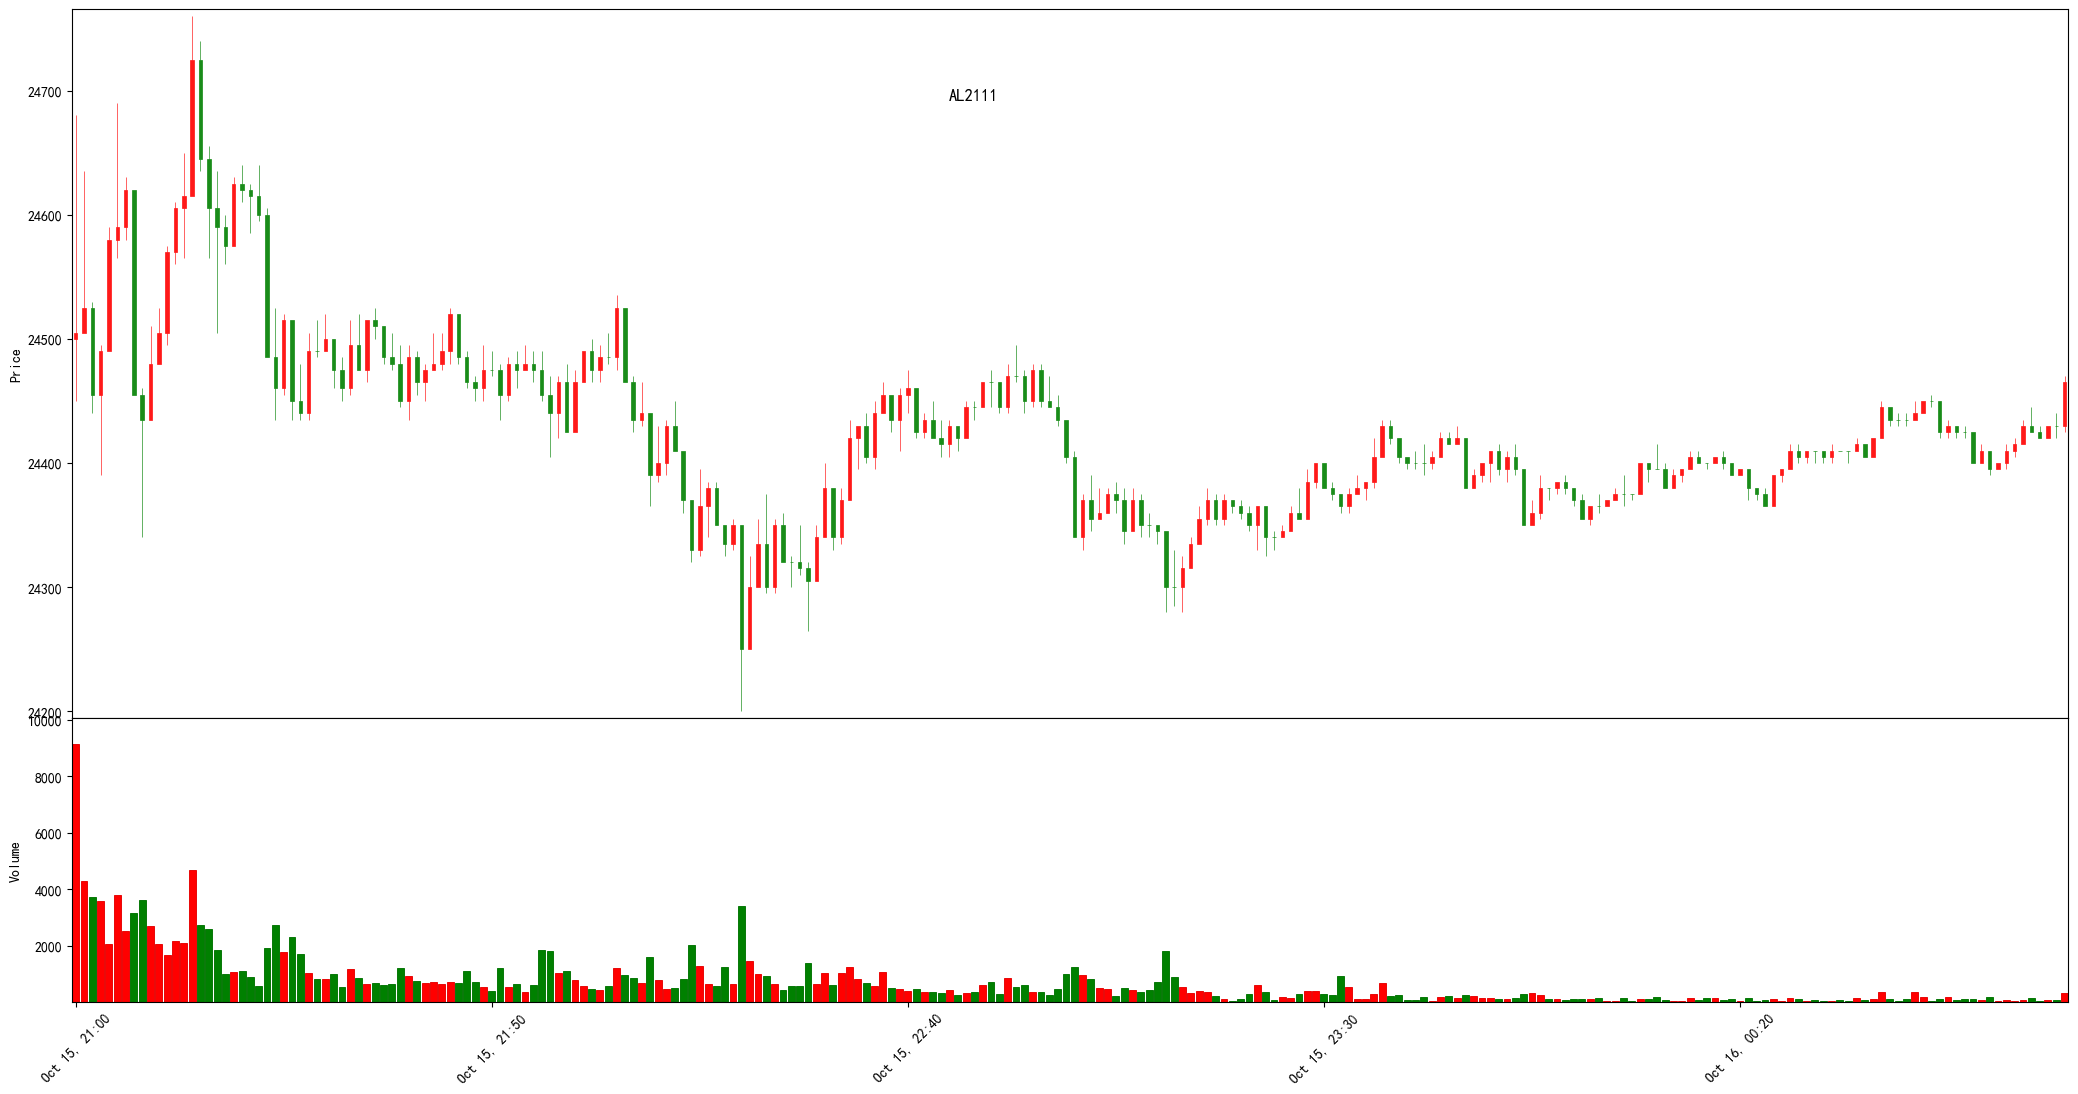

In [9]:
mpf.plot(
    df_plot,
    title='AL2111',
    type='candle',
    volume=True,
    show_nontrading=False,
    figratio=(40, 20),
    figscale=2,
    style=mpf_style,
    tight_layout=True
)

### 均线

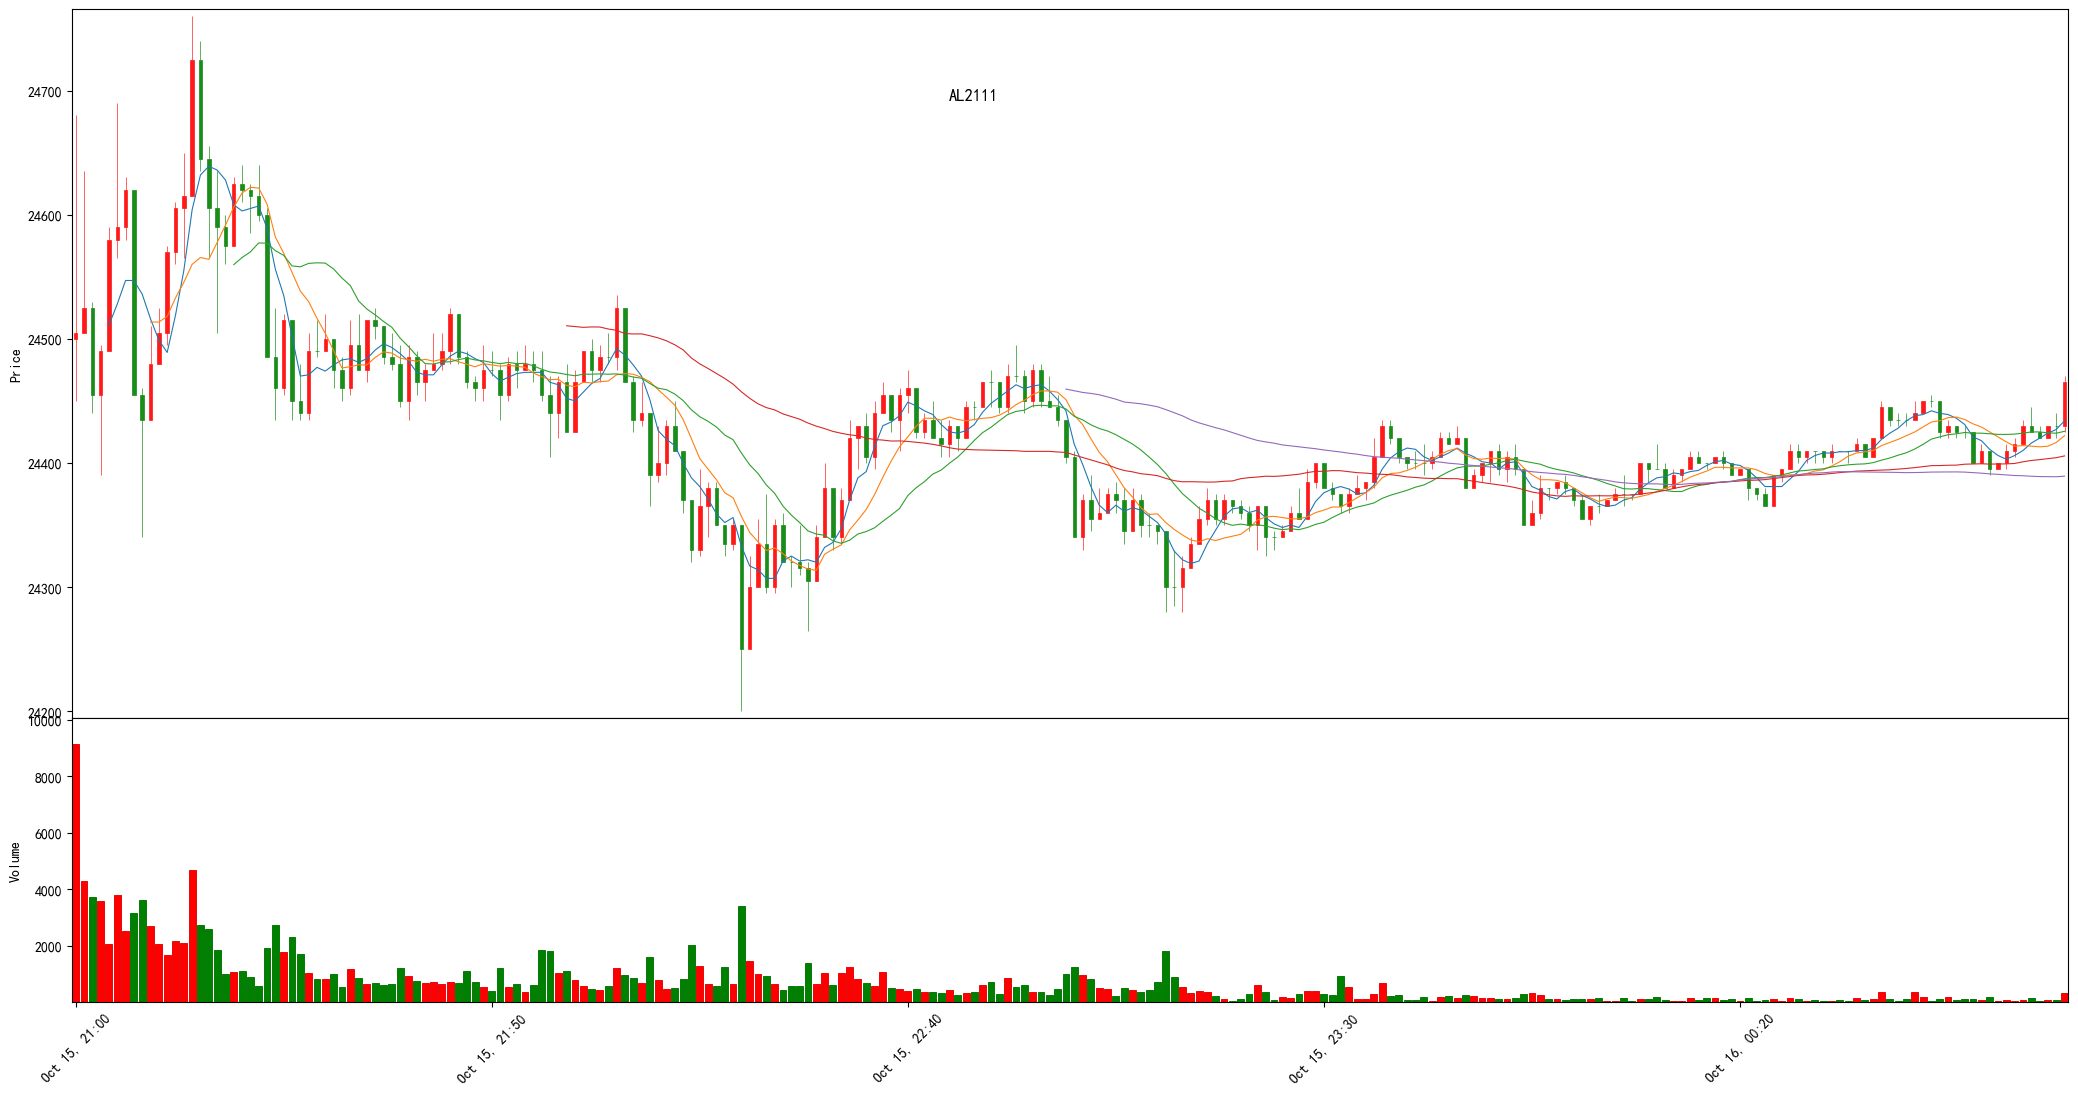

In [10]:
mpf.plot(
    df_plot,
    title='AL2111',
    type='candle',
    volume=True,
    mav=(5, 10, 20, 60, 120, 240),
    show_nontrading=False,
    figratio=(40, 20),
    figscale=2,
    style=mpf_style,
    tight_layout=True
)

### 均线（自定义颜色）

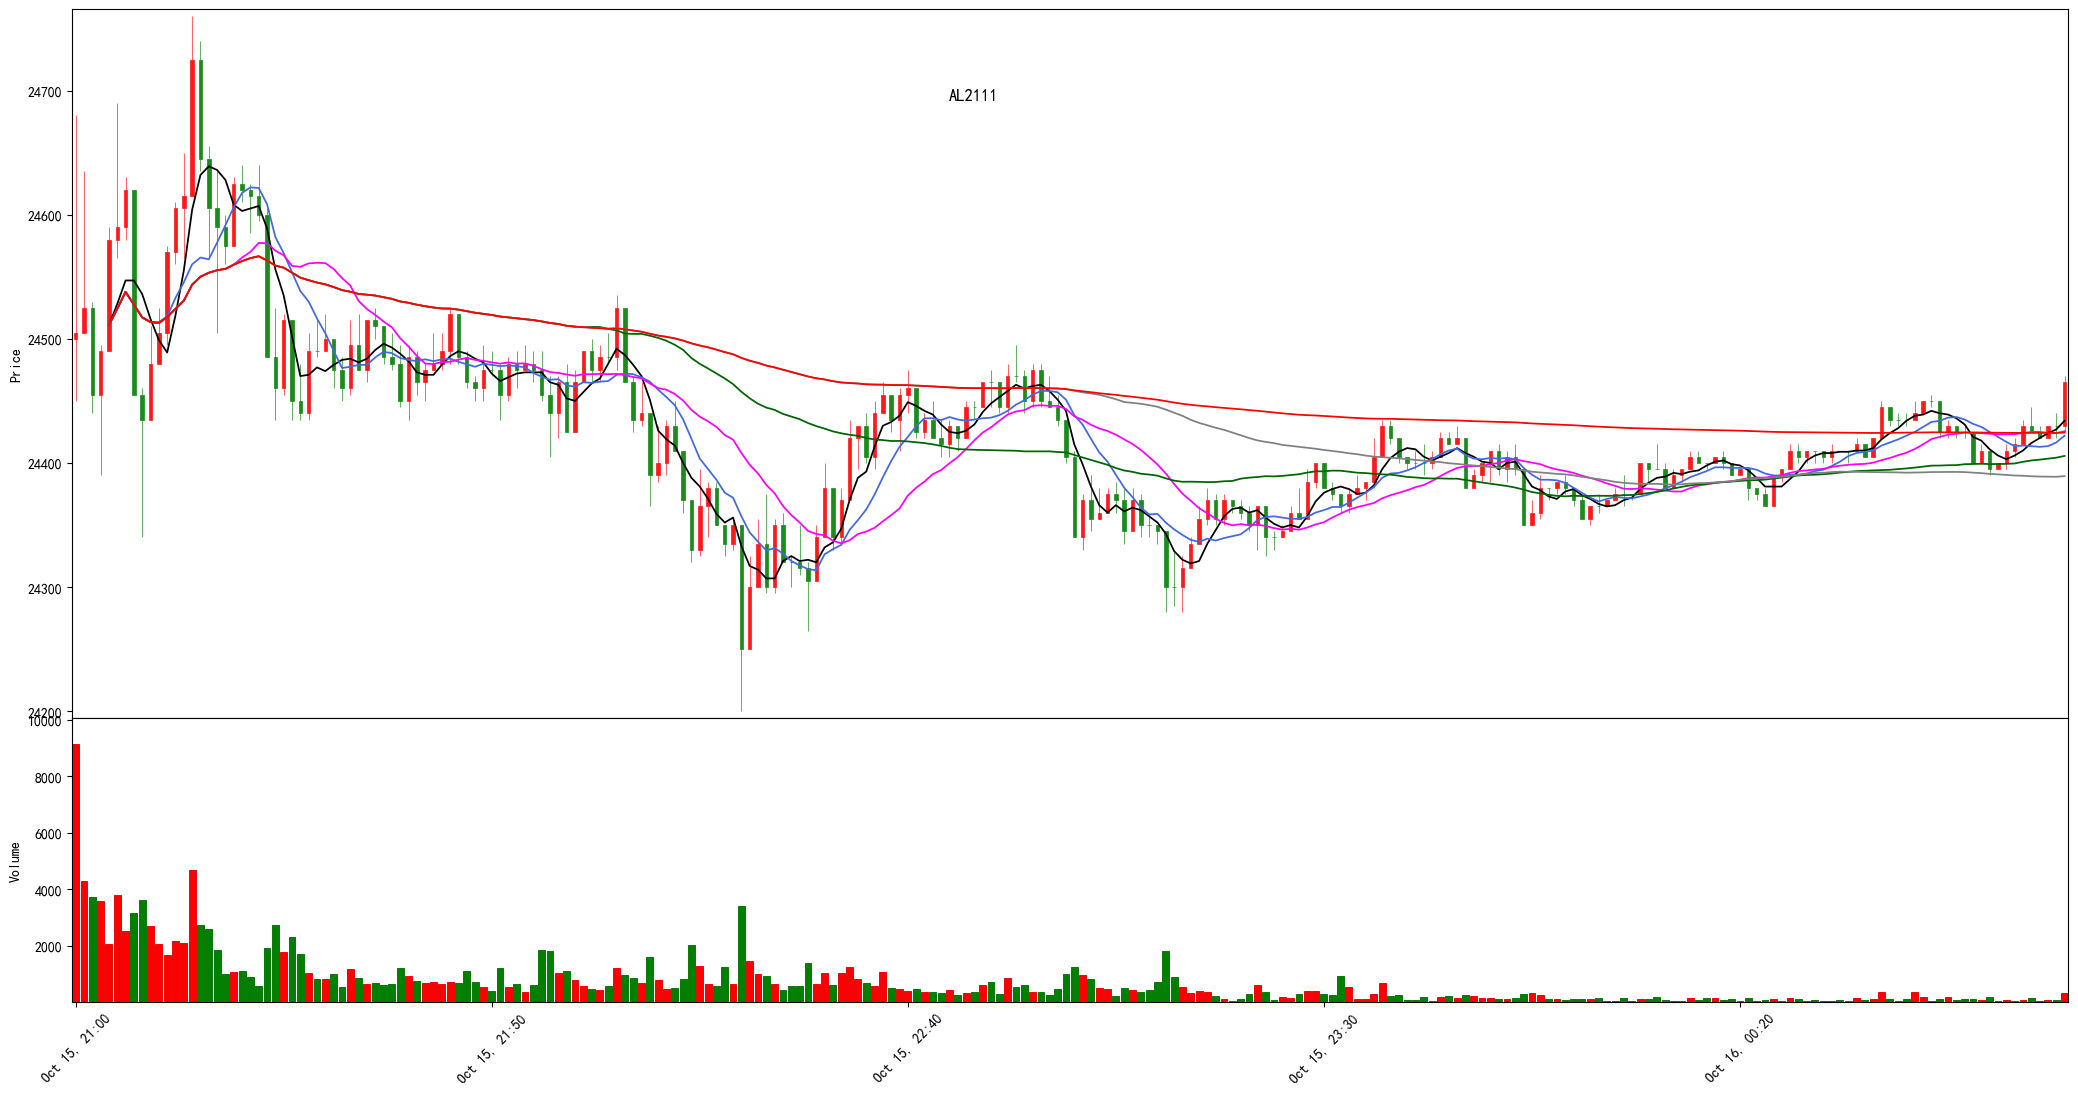

In [11]:
indicator_colors: List[str] = ['black', 'royalblue', 'magenta', 'darkgreen', 'grey', 'red', 'orange', 'darkgoldenrod', 'purple', 'lightseagreen']

def ma(df: pd.DataFrame, period_list: List[int]) -> pd.DataFrame:
    result: pd.DataFrame = df.copy()
    label: str
    for period in period_list:
        label = f'ma{str(period)}'
        result[label] = df['close'].rolling(period, min_periods=5).mean()
    return result

# 均线参数组。
ma_period_list: List[int] = [5, 10, 20, 60, 120, 240]

# 指标数据生成。
df_plot = ma(df_plot, ma_period_list)

# 指标添加。
parameters: List[Tuple[str, str]] = [(f'ma{str(ma_period_list[i])}', indicator_colors[i]) for i in range(len(ma_period_list))]
indicator = [
    mpf.make_addplot(
        df_plot[parameters[i][0]],
        color=parameters[i][1]
    ) for i in range(len(ma_period_list))
]
# 上面的写法就是自动循环的下面的写法。
# indicator = [
#     mpf.make_addplot(df_plot['ma5'], color='k'),
#     mpf.make_addplot(df_plot['ma20'], color='b'),
# ]

# 画图。
mpf.plot(
    df_plot,
    title='AL2111',
    type='candle',
    volume=True,
    addplot=indicator,
    show_nontrading=False,
    figratio=(40, 20),
    figscale=2,
    style=mpf_style,
    tight_layout=True,
    warn_too_much_data=2000
)

### 瀑布线

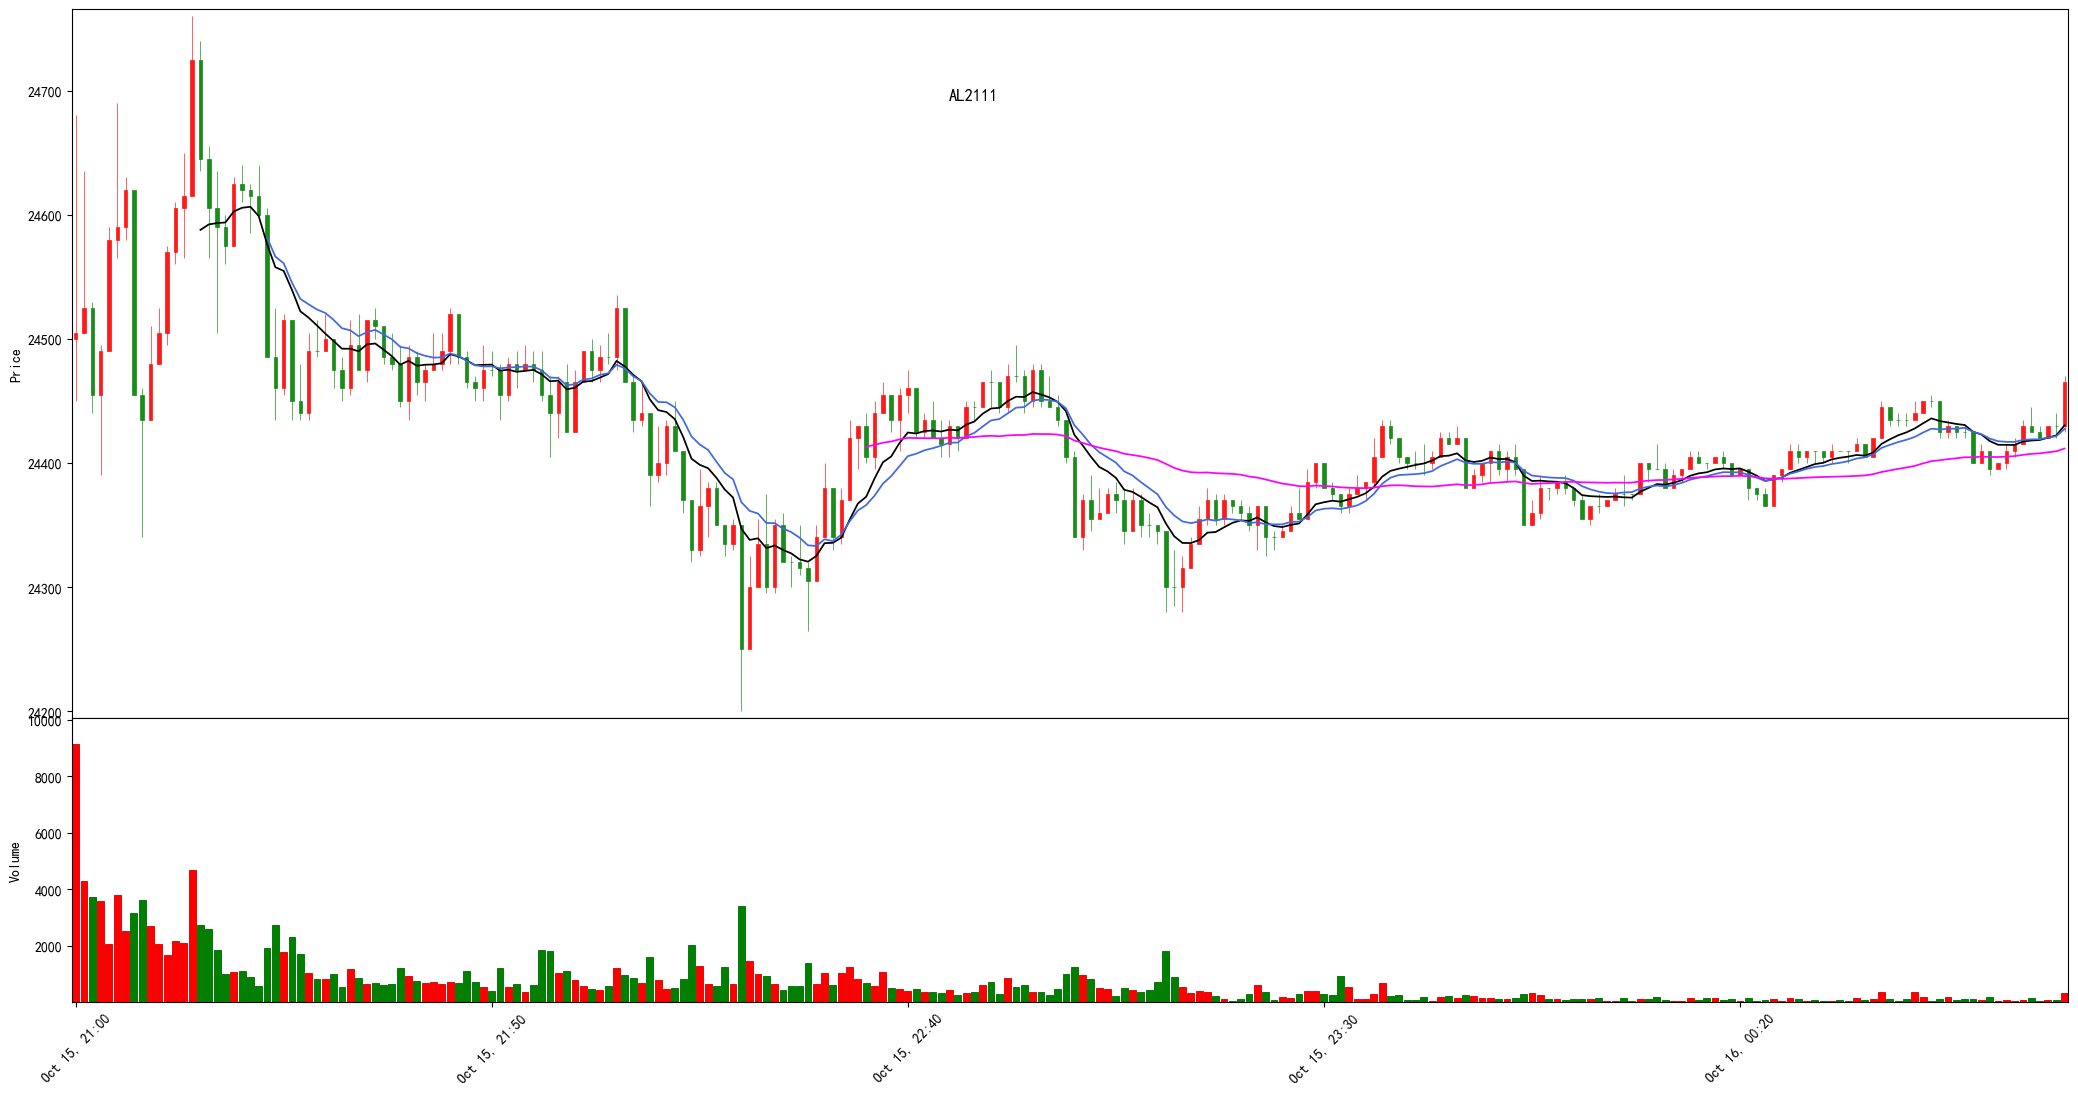

In [12]:
def pbx(df: pd.DataFrame, period_list: List[int]) -> pd.DataFrame:
    """
    Add PBX indicator.
    """
    result: pd.DataFrame = df.copy()
    
    label: str
    for period in period_list:
        label = f'pbx{str(period)}'
        result[label] = (
            df['close'].ewm(span=period, adjust=False).mean() +
            df['close'].rolling(period*2).mean() +
            df['close'].rolling(period*4).mean()
        ) / 3

    return result

# 均线参数组。
pbx_period_list: List[int] = [4, 6, 24]

# 指标数据生成。
df_plot = pbx(df_plot, pbx_period_list)

# 指标添加。
parameters: List[Tuple[str, str]] = [(f'pbx{str(pbx_period_list[i])}', indicator_colors[i]) for i in range(len(pbx_period_list))]
indicator = [
    mpf.make_addplot(
        df_plot[parameters[i][0]],
        color=parameters[i][1]
    ) for i in range(len(pbx_period_list))
]

# 画图。
mpf.plot(
    df_plot,
    title='AL2111',
    type='candle',
    volume=True,
    addplot=indicator,
    show_nontrading=False,
    figratio=(40, 20),
    figscale=2,
    style=mpf_style,
    tight_layout=True
)

### 布林线

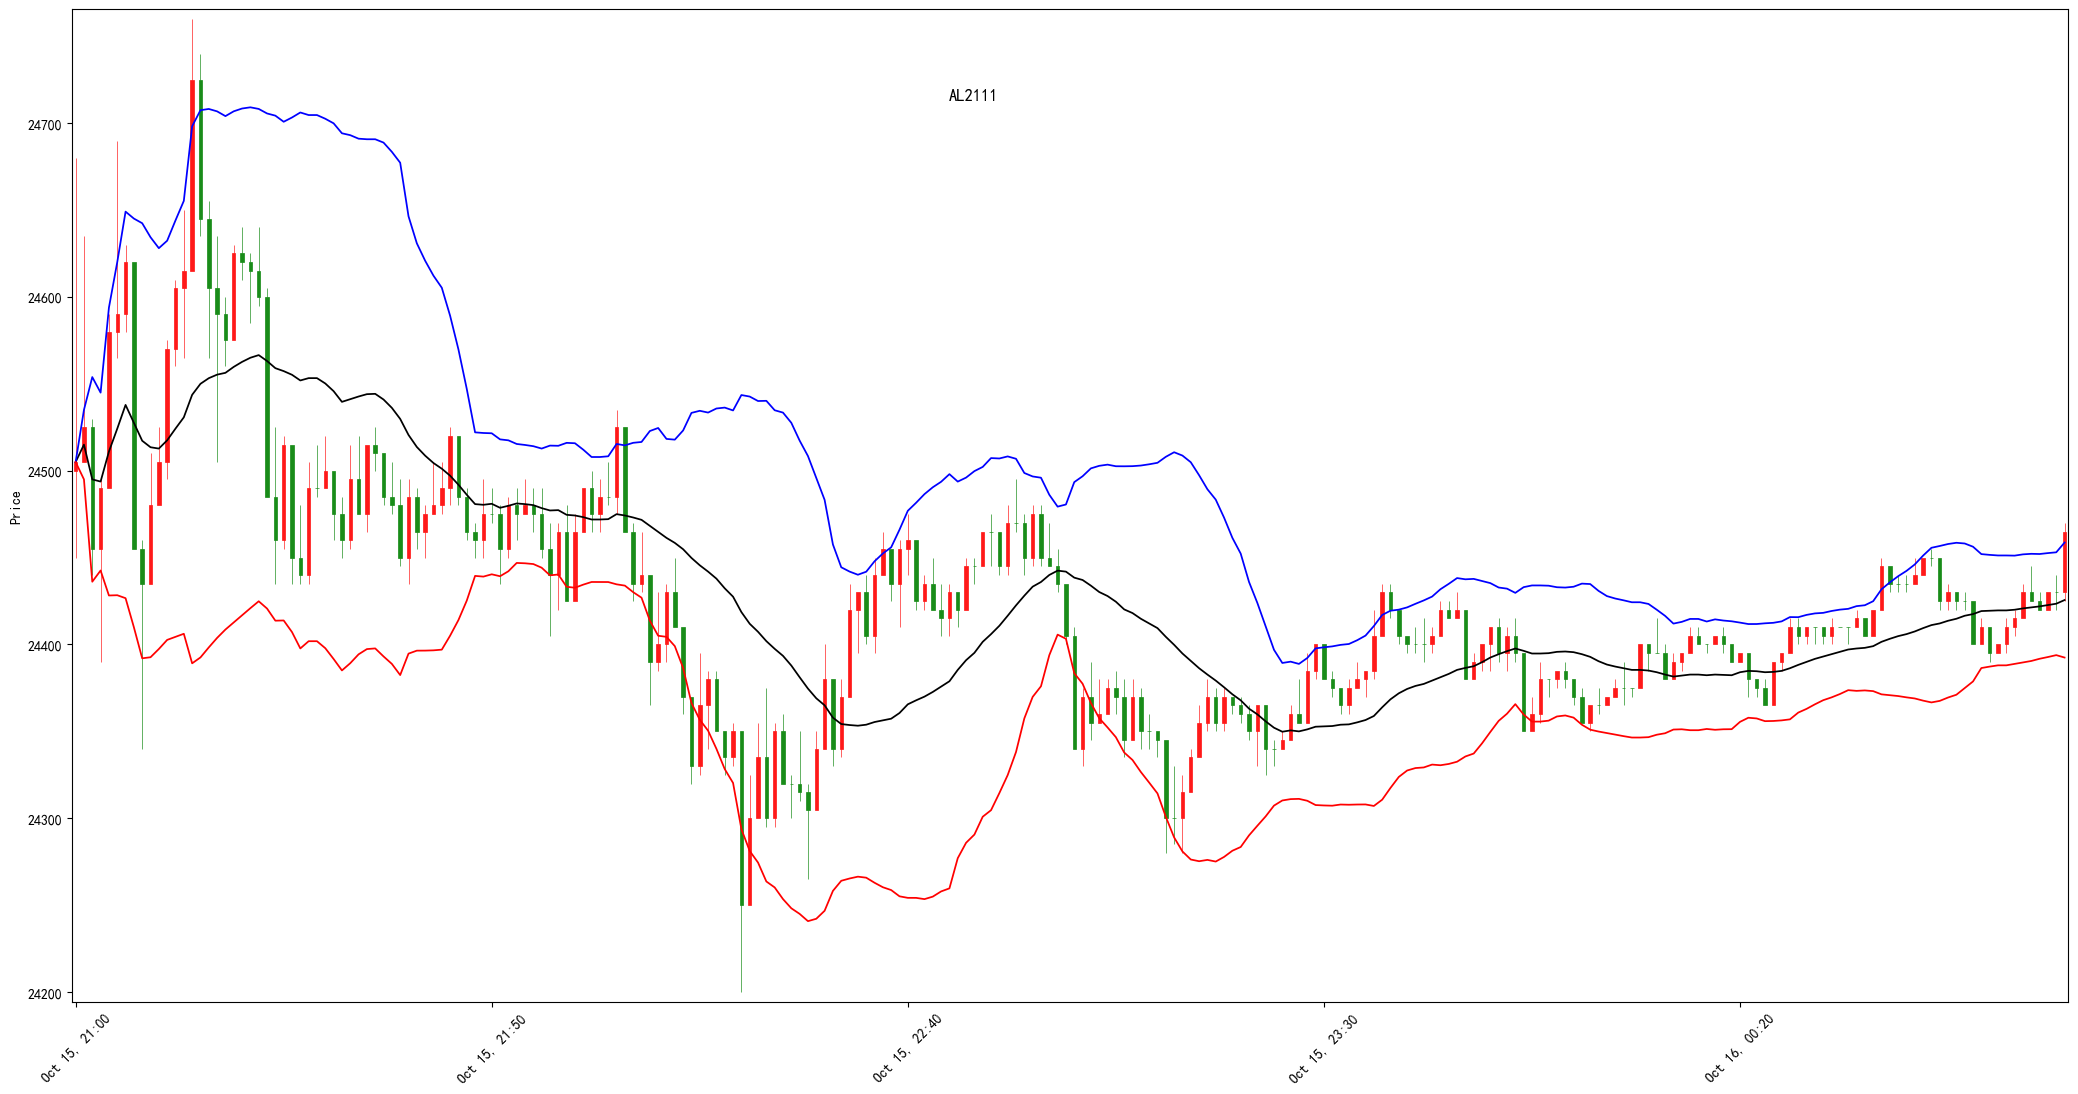

In [13]:
def boll(df: pd.DataFrame, n: int, m: int) -> pd.DataFrame:
    """
    Add BOLL indicator.
    """
    result: pd.DataFrame = df.copy()
    # 标准差
    result['std'] = df['close'].rolling(n, min_periods=1).std(ddof=0)
    # 中轨
    result['median'] = df['close'].rolling(n, min_periods=1).mean()
    # 上下轨
    result['upper'] = result['median'] + result['std'] * m
    result['lower'] = result['median'] - result['std'] * m
    return result

# 指标数据生成。
df_plot = boll(df_plot, 26, 2)

# 指标添加。
indicator = [
    mpf.make_addplot(df_plot['median'], color='k'),
    mpf.make_addplot(df_plot['upper'], color='b'),
    mpf.make_addplot(df_plot['lower'], color='r'),
]

# 画图。
mpf.plot(
    df_plot,
    title='AL2111',
    type='candle',
    volume=True,
    addplot=indicator,
    show_nontrading=False,
    figratio=(40, 20),
    figscale=2,
    style=mpf_style,
    tight_layout=True,
    warn_too_much_data=2000
)